In [1]:
from tp1.leer_archivo import leer_archivo
from tp1.tiempo_optimo import tiempo_optimo
import os
import time

directorio = '../tests/data/'  
archivos = os.listdir(directorio)
archivos = sorted(archivos, key=lambda archivo: int(archivo.split(' ')[0]))
resultado = []

for archivo in archivos:
    print("Trabajando con archivo: " + archivo)
    tiempos_analisis = leer_archivo(directorio + archivo)
    
    tiempo_inicio = time.time()
    tiempo_optimo(tiempos_analisis)
    tiempo_fin = time.time()
    
    tiempo_ejecucion = (tiempo_fin - tiempo_inicio) * 1000
    print("N=" + str(len(tiempos_analisis)) + " T=" + f"{tiempo_ejecucion:.2f} ms")
    resultado.append((str(len(tiempos_analisis)), f"{tiempo_ejecucion:.2f}"))

print(resultado)


Trabajando con archivo: 10000 elementos.txt
N=10000 T=2.50 ms
Trabajando con archivo: 20000 elementos.txt
N=20000 T=5.00 ms
Trabajando con archivo: 30000 elementos.txt
N=30000 T=7.50 ms
Trabajando con archivo: 40000 elementos.txt
N=40000 T=11.00 ms
Trabajando con archivo: 50000 elementos.txt
N=50000 T=14.00 ms
Trabajando con archivo: 60000 elementos.txt
N=60000 T=18.50 ms
Trabajando con archivo: 70000 elementos.txt
N=70000 T=21.00 ms
Trabajando con archivo: 80000 elementos.txt
N=80000 T=24.50 ms
Trabajando con archivo: 90000 elementos.txt
N=90000 T=29.50 ms
Trabajando con archivo: 100000 elementos.txt
N=100000 T=31.50 ms
Trabajando con archivo: 110000 elementos.txt
N=110000 T=36.50 ms
Trabajando con archivo: 120000 elementos.txt
N=120000 T=41.50 ms
Trabajando con archivo: 130000 elementos.txt
N=130000 T=46.50 ms
Trabajando con archivo: 140000 elementos.txt
N=140000 T=55.00 ms
Trabajando con archivo: 150000 elementos.txt
N=150000 T=53.50 ms
Trabajando con archivo: 160000 elementos.txt
N

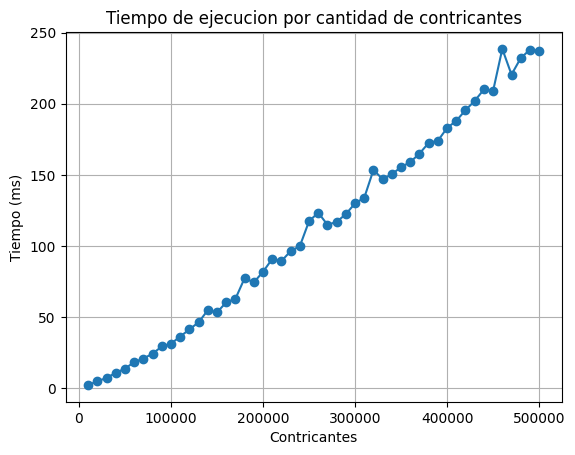

In [2]:
import matplotlib.pyplot as plt

contricantes = [int(analisis[0]) for analisis in resultado]
tiempos = [float(analisis[1]) for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()